### Evaluate cc predictions for each model for each site

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import scipy.stats as ss
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['font.size'] = 8

import sys; sys.path.append("/auto/users/hellerc/code/projects/nat_pupil_ms/")
from global_settings import HIGHR_SITES, CPN_SITES

In [2]:
savedir = "/auto/users/hellerc/results/nat_pupil_ms/normativeModel/modelPreds/"
filename = "cc_err_perstim.pickle"

In [3]:
architecture_spec = "stategain_chanCtrl_ccnorm.md_ss3.rb5"
mn_shortened = [
    f'firstOrderOnly_{architecture_spec}',
    f'indepNoise_{architecture_spec}',
    f'oneLV_{architecture_spec}',
    f'twoLV_{architecture_spec}'
]

#same models without random seed
architecture_spec0 = architecture_spec.replace(".rb5", "")
architecture_spec0 = "stategain_chanCtrl_indep.g_ccnorm.md_ss3.rb5"
mn_shortened0 = [
    f'firstOrderOnly_{architecture_spec0}',
    f'indepNoise_{architecture_spec0}',
    f'oneLV_{architecture_spec0}',
    f'twoLV_{architecture_spec0}'
]

In [4]:
null = False
sites = CPN_SITES + HIGHR_SITES
batches = [331]*len(CPN_SITES) + [322 if s not in ["BOL005c", "BOL006b"] else 294 for s in HIGHR_SITES]

diag_avg = np.zeros((len(mn_shortened), len(batches)))
diag_diff = np.zeros((len(mn_shortened), len(batches)))
cc_avg = np.zeros((len(mn_shortened), len(batches)))
cc_diff = np.zeros((len(mn_shortened), len(batches)))
diag_avg0 = np.zeros((len(mn_shortened), len(batches)))
diag_diff0 = np.zeros((len(mn_shortened), len(batches)))
cc_avg0 = np.zeros((len(mn_shortened), len(batches)))
cc_diff0 = np.zeros((len(mn_shortened), len(batches)))
for i, (site, batch) in enumerate(zip(sites, batches)):
    for j, mn in enumerate(mn_shortened):
        fn = savedir + f"{site}_{batch}/{mn}/{filename}"
        with open(fn, 'rb') as handle:
            errs = pickle.load(handle) 
        if "perstim" in filename:
            errs = errs["all"]   
        diag_avg[j, i] = errs["avg_err_diag"]
        diag_diff[j, i] = errs["delta_err_diag"]
        cc_avg[j, i] = errs["avg_err_up"]
        cc_diff[j, i] = errs["delta_err_up"]  

        if null:
            fn0 = savedir + f"{site}_{batch}/{mn_shortened0[j]}/{filename}"
            with open(fn0, 'rb') as handle:
                errs = pickle.load(handle)    
            diag_avg0[j, i] = errs["avg_err_diag"]
            diag_diff0[j, i] = errs["delta_err_diag"]
            cc_avg0[j, i] = errs["avg_err_up"]
            cc_diff0[j, i] = errs["delta_err_up"]  


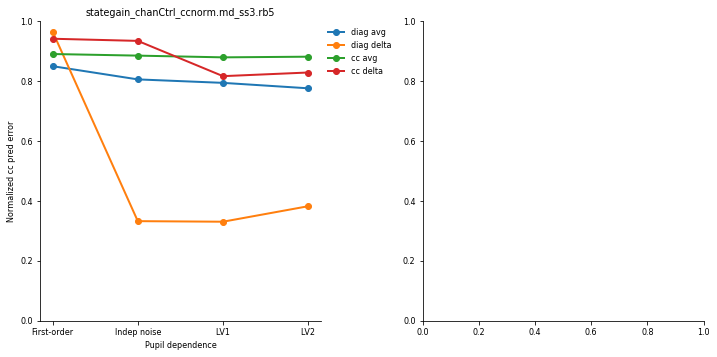

In [5]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

diag_avg_norm = np.max(np.concatenate((diag_avg.max(axis=0, keepdims=True), diag_avg0.max(axis=0, keepdims=True)), axis=0), axis=0)
diag_diff_norm = np.max(np.concatenate((diag_diff.max(axis=0, keepdims=True), diag_diff0.max(axis=0, keepdims=True)), axis=0), axis=0)
cc_avg_norm = np.max(np.concatenate((cc_avg.max(axis=0, keepdims=True), cc_avg0.max(axis=0, keepdims=True)), axis=0), axis=0)
cc_diff_norm = np.max(np.concatenate((cc_diff.max(axis=0, keepdims=True), cc_diff0.max(axis=0, keepdims=True)), axis=0), axis=0)

diag_avg_norm = diag_avg.max(axis=0)
diag_diff_norm = diag_diff.max(axis=0)
cc_avg_norm = cc_avg.max(axis=0)
cc_diff_norm = cc_diff.max(axis=0)

ax[0].plot((diag_avg/diag_avg_norm).mean(axis=1), "-o", lw=2, label="diag avg")
ax[0].plot((diag_diff/diag_diff_norm).mean(axis=1), "-o", lw=2, label="diag delta")
ax[0].plot((cc_avg/cc_avg_norm).mean(axis=1), "-o", lw=2, label="cc avg")
ax[0].plot((cc_diff/cc_diff_norm).mean(axis=1), "-o", lw=2, label="cc delta")
ax[0].legend(frameon=False, bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_ylabel("Normalized cc pred error")
ax[0].set_xticks([0, 1, 2, 3])
ax[0].set_xticklabels(["First-order", "Indep noise", "LV1", "LV2"])
ax[0].set_xlabel("Pupil dependence")
ax[0].set_title(architecture_spec)
ax[0].set_ylim(0, 1)

if null:
    ax[1].plot((diag_avg0/diag_avg_norm).mean(axis=1), "-o", lw=2, label="diag avg")
    ax[1].plot((diag_diff0/diag_diff_norm).mean(axis=1), "-o", lw=2, label="diag delta")
    ax[1].plot((cc_avg0/cc_avg_norm).mean(axis=1), "-o", lw=2, label="cc avg")
    ax[1].plot((cc_diff0/cc_diff_norm).mean(axis=1), "-o", lw=2, label="cc delta")
    ax[1].legend(frameon=False, bbox_to_anchor=(1, 1), loc="upper left")
    ax[1].set_ylabel("Normalized cc pred error")
    ax[1].set_xticks([0, 1, 2, 3])
    ax[1].set_xticklabels(["First-order", "Indep noise", "LV1", "LV2"])
    ax[1].set_xlabel("Pupil dependence")
    ax[1].set_title(architecture_spec0)
    ax[1].set_ylim(0, 1)

f.tight_layout()

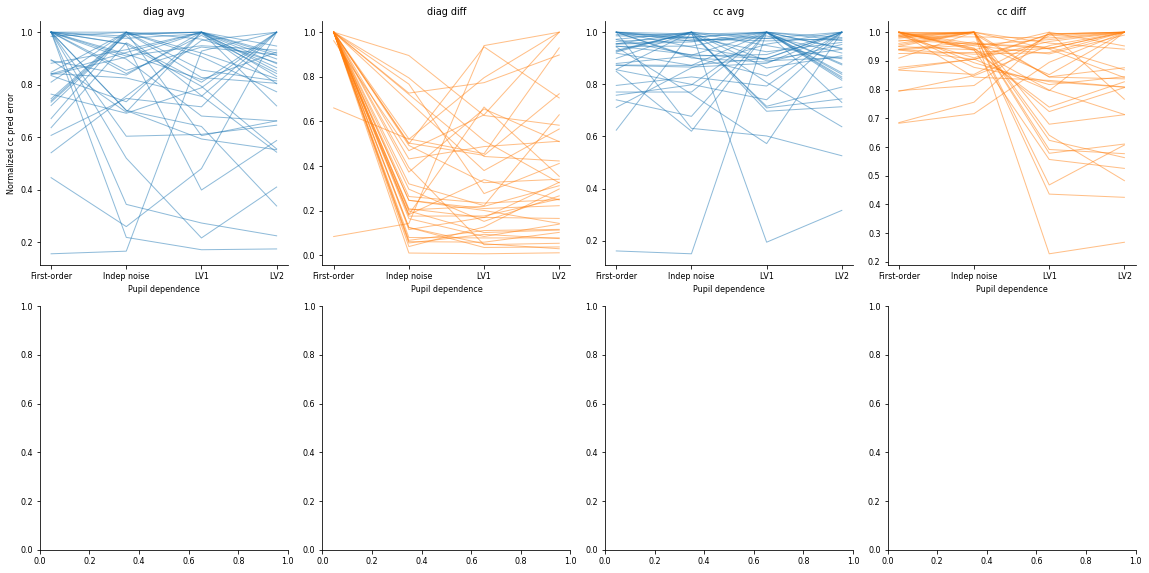

In [6]:
f, ax = plt.subplots(2, 4, figsize=(16, 8))

ax[0, 0].plot((diag_avg/diag_avg_norm), color="tab:blue", alpha=0.5, lw=1)
ax[0, 1].plot((diag_diff/diag_diff_norm), color="tab:orange", alpha=0.5, lw=1)
ax[0, 2].plot((cc_avg/cc_avg_norm), color="tab:blue", alpha=0.5, lw=1)
ax[0, 3].plot((cc_diff/cc_diff_norm), color="tab:orange", alpha=0.5, lw=1)
ax[0, 0].set_ylabel("Normalized cc pred error")
for a, ms in zip(ax[0, :], ["diag avg", "diag diff", "cc avg", "cc diff"]):
    a.set_title(ms)
    a.set_xticks([0, 1, 2, 3])
    a.set_xticklabels(["First-order", "Indep noise", "LV1", "LV2"])
    a.set_xlabel("Pupil dependence")

if null:
    ax[1, 0].plot((diag_avg0/diag_avg_norm), color="tab:blue", alpha=0.5, lw=1)
    ax[1, 1].plot((diag_diff0/diag_diff_norm), color="tab:orange", alpha=0.5, lw=1)
    ax[1, 2].plot((cc_avg0/cc_avg_norm), color="tab:blue", alpha=0.5, lw=1)
    ax[1, 3].plot((cc_diff0/cc_diff_norm), color="tab:orange", alpha=0.5, lw=1)
    ax[1, 0].set_ylabel("Normalized cc pred error")
    for a, ms in zip(ax[1, :], ["diag avg", "diag diff", "cc avg", "cc diff"]):
        a.set_title(ms)
        a.set_xticks([0, 1, 2, 3])
        a.set_xticklabels(["First-order", "Indep noise", "LV1", "LV2"])
        a.set_xlabel("Pupil dependence")

f.tight_layout()

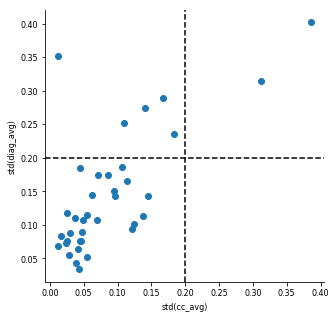

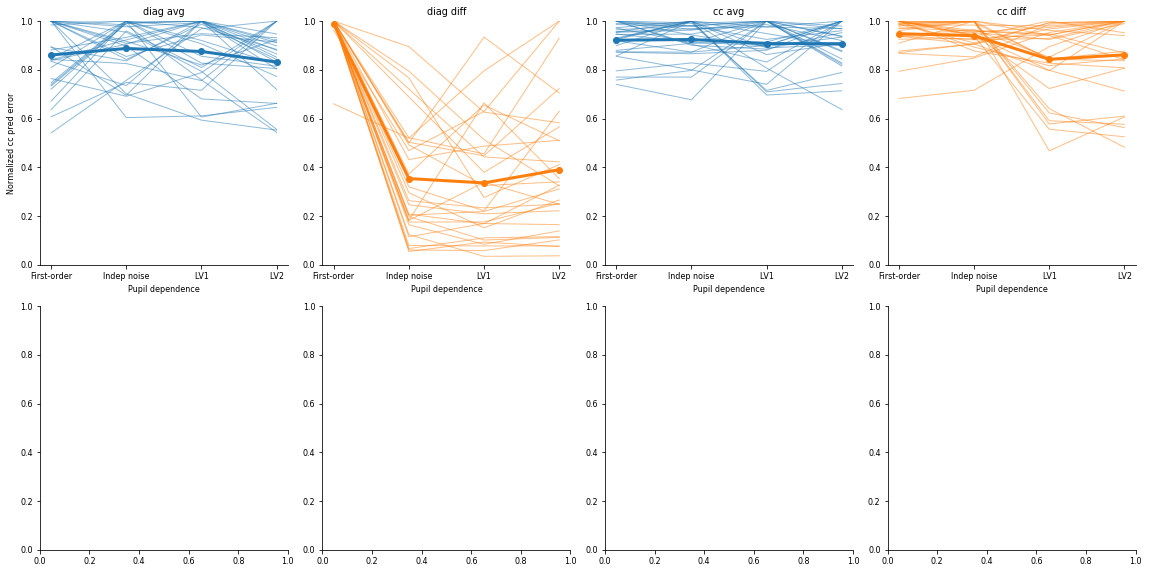

In [7]:
# exclude unreliable sites (where pred. of avg. is unreliable -- it shouldn't change)
threshold = 0.2
filter = ((cc_avg/cc_avg_norm).std(axis=0) < threshold) & ((diag_avg/diag_avg_norm).std(axis=0) < threshold)
#filter = filter & (((cc_avg0/cc_avg_norm).std(axis=0) < threshold) | ((diag_avg0/diag_avg_norm).std(axis=0) < threshold))
f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot((cc_avg/cc_avg_norm).std(axis=0),(diag_avg/diag_avg_norm).std(axis=0), "o")
ax.axvline(threshold, color="k", linestyle="--")
ax.axhline(threshold, color="k", linestyle="--")
ax.set_xlabel("std(cc_avg)")
ax.set_ylabel("std(diag_avg)")


f, ax = plt.subplots(2, 4, figsize=(16, 8))

ax[0, 0].plot((diag_avg[:, filter]/diag_avg_norm[filter]), color="tab:blue", alpha=0.5, lw=1)
ax[0, 0].plot((diag_avg[:, filter]/diag_avg_norm[filter]).mean(axis=-1), color="tab:blue", marker="o", lw=3)
ax[0, 1].plot((diag_diff[:, filter]/diag_diff_norm[filter]), color="tab:orange", alpha=0.5, lw=1)
ax[0, 1].plot((diag_diff[:, filter]/diag_diff_norm[filter]).mean(axis=-1), color="tab:orange", marker="o", lw=3)
ax[0, 2].plot((cc_avg[:, filter]/cc_avg_norm[filter]), color="tab:blue", alpha=0.5, lw=1)
ax[0, 2].plot((cc_avg[:, filter]/cc_avg_norm[filter]).mean(axis=-1), color="tab:blue", marker="o", lw=3)
ax[0, 3].plot((cc_diff[:, filter]/cc_diff_norm[filter]), color="tab:orange", alpha=0.5, lw=1)
ax[0, 3].plot((cc_diff[:, filter]/cc_diff_norm[filter]).mean(axis=-1), color="tab:orange", marker="o", lw=3)
ax[0, 0].set_ylabel("Normalized cc pred error")
for a, ms in zip(ax[0, :], ["diag avg", "diag diff", "cc avg", "cc diff"]):
    a.set_title(ms)
    a.set_ylim((0, 1))
    a.set_xticks([0, 1, 2, 3])
    a.set_xticklabels(["First-order", "Indep noise", "LV1", "LV2"])
    a.set_xlabel("Pupil dependence")

if null:
    ax[1, 0].plot((diag_avg0[:, filter]/diag_avg_norm[filter]), color="tab:blue", alpha=0.5, lw=1)
    ax[1, 1].plot((diag_diff0[:, filter]/diag_diff_norm[filter]), color="tab:orange", alpha=0.5, lw=1)
    ax[1, 2].plot((cc_avg0[:, filter]/cc_avg_norm[filter]), color="tab:blue", alpha=0.5, lw=1)
    ax[1, 3].plot((cc_diff0[:, filter]/cc_diff_norm[filter]), color="tab:orange", alpha=0.5, lw=1)
    ax[1, 0].set_ylabel("Normalized cc pred error")
    for a, ms in zip(ax[1, :], ["diag avg", "diag diff", "cc avg", "cc diff"]):
        a.set_title(ms)
        a.set_xticks([0, 1, 2, 3])
        a.set_xticklabels(["First-order", "Indep noise", "LV1", "LV2"])
        a.set_xlabel("Pupil dependence")

f.tight_layout()

In [8]:
np.array(sites)[~filter]

array(['ARM029a', 'TNC013a', 'TNC014a', 'DRX007a.e1:64', 'TNC008a',
       'TNC009a', 'TNC013a'], dtype='<U15')

(0, 2)

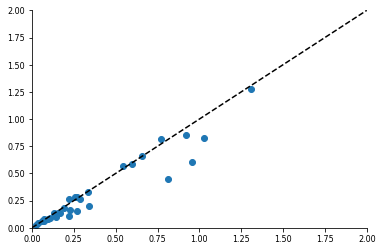

In [11]:
plt.plot(cc_diff[0, filter], cc_diff[2, filter], "o")
plt.plot([0, 2], [0, 2], "k--")
plt.xlim((0,2))
plt.ylim((0,2))

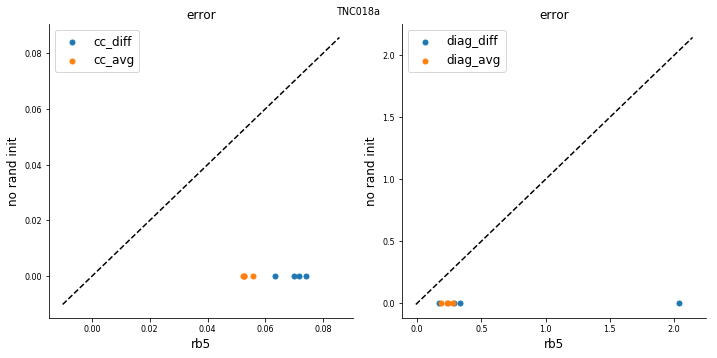

In [10]:
site = "TNC018a"
n = np.argwhere(np.array(sites)==site)[0][0]
f, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(cc_diff[:, n], cc_diff0[:, n], s=25, label="cc_diff")
ax[0].scatter(cc_avg[:, n], cc_avg0[:, n], s=25, label="cc_avg")
mi = np.min(ax[0].get_xlim() + ax[0].get_ylim())
ma = np.max(ax[0].get_xlim() + ax[0].get_ylim())
ax[0].plot([mi, ma], [mi, ma], 'k--')
ax[0].set_xlabel("rb5", fontsize=12)
ax[0].set_ylabel("no rand init", fontsize=12)
ax[0].legend(fontsize=12)
ax[0].set_title("error", fontsize=12)

ax[1].scatter(diag_diff[:, n], diag_diff0[:, n], s=25, label="diag_diff")
ax[1].scatter(diag_avg[:, n], diag_avg0[:, n], s=25, label="diag_avg")
mi = np.min(ax[1].get_xlim() + ax[1].get_ylim())
ma = np.max(ax[1].get_xlim() + ax[1].get_ylim())
ax[1].plot([mi, ma], [mi, ma], 'k--')
ax[1].set_xlabel("rb5", fontsize=12)
ax[1].set_ylabel("no rand init", fontsize=12)
ax[1].legend(fontsize=12)
ax[1].set_title("error", fontsize=12)

f.suptitle(site)

f.tight_layout()

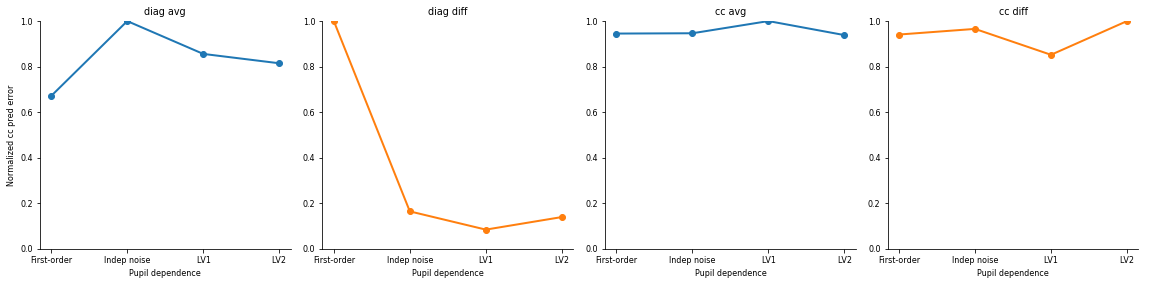

In [11]:
f, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].plot((diag_avg[:, n]/diag_avg_norm[n]), "-o", color="tab:blue", alpha=1, lw=2)
ax[1].plot((diag_diff[:, n]/diag_diff_norm[n]), "-o", color="tab:orange", alpha=1, lw=2)
ax[2].plot((cc_avg[:, n]/cc_avg_norm[n]), "-o", color="tab:blue", alpha=1, lw=2)
ax[3].plot((cc_diff[:, n]/cc_diff_norm[n]), "-o", color="tab:orange", alpha=1, lw=2)
ax[0].set_ylabel("Normalized cc pred error")
for a, ms in zip(ax, ["diag avg", "diag diff", "cc avg", "cc diff"]):
    a.set_title(ms)
    a.set_ylim((0, 1))
    a.set_xticks([0, 1, 2, 3])
    a.set_xticklabels(["First-order", "Indep noise", "LV1", "LV2"])
    a.set_xlabel("Pupil dependence")

f.tight_layout()

# Register with decoding results

In [12]:
import charlieTools.nat_sounds_ms.decoding as decoding
import os
from path_settings import DPRIME_DIR

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2022-02-16 233300.log


In [13]:
site_batches = [s+"_"+str(b) for (s, b) in zip(sites, batches)]
decoder  = 'dprime_jk10_zscore_allPup_fixtdr2-fa'
models = {
    "rlv": 'psth.fs4.pup-ld-st.pup+r2+s1,2-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.2xR.x2,3-spred-lvnorm.4xR.so.x1-inoise.4xR.x1,3_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.md.t5.f0.ss3.rb5',
    "ind": 'psth.fs4.pup-ld-st.pup+r2+s1,2-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.2xR.x2,3-spred-lvnorm.4xR.so.x1-inoise.4xR.x2,3_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.md.t5.f0.ss3.rb5',
    "plv": 'psth.fs4.pup-ld-st.pup+r2+s1,2-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.2xR.x2,3-spred-lvnorm.4xR.so.x3-inoise.4xR.x2,3_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.md.t5.f0.ss3.rb5',
    "plv2": 'psth.fs4.pup-ld-st.pup+r2-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.2xR.x2,3-spred-lvnorm.4xR.so.x3-inoise.4xR.x2,3_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.md.t5.f0.ss3.rb5',
}

results = {}
for sb in site_batches:
    results[sb] = dict.fromkeys(list(models.keys())+["raw"])
    batch = int(sb.split("_")[1])
    site = sb.split("_")[0]
    if site.startswith("BOL"):
        batch = 294
    for ii, (m, k) in enumerate(zip(models.values(), models.keys())):    
        results[sb][k] = {} 
        if batch != 331:
            mn = m.replace("-epcpn", "")
            d = decoder
        else:
            d = decoder.replace("_allPup", "")
            mn = m
        d = decoder.replace("_allPup", "")
        loader = decoding.DecodingResults()
        fn = os.path.join(DPRIME_DIR, str(batch), site, d+f'_model-LV-{mn}_TDR.pickle')
        res = loader.load_results(fn)
        # get the epochs of interest (fit epochs)
        mask_bins = res.meta['mask_bins']
        fit_combos = [k for k, v in res.mapping.items() if (('_'.join(v[0].split('_')[:-1]), int(v[0].split('_')[-1])) in mask_bins) & \
                                                            (('_'.join(v[1].split('_')[:-1]), int(v[1].split('_')[-1])) in mask_bins)]
        all_combos = res.evoked_stimulus_pairs
        val_combos = [c for c in all_combos if c not in fit_combos]
        df = res.numeric_results
        df["delta_dprime"] = (df['bp_dp'] - df['sp_dp']) / (df['bp_dp'] + df['sp_dp'])
        df["delta_dprime_raw"] = (df['bp_dp'] - df['sp_dp'])
        df["site"] = site
        df["batch"] = batch
        results[sb][k]["fit"] = df.loc[fit_combos]
        results[sb][k]["val"] = df.loc[val_combos]
        if ii==0:
            fitc = fit_combos
            valc = val_combos
        else:
            if fitc != fit_combos:
                raise ValueError("what the fuck is up")

    # load raw results
    if batch != 331:
        mn = m.replace("-epcpn", "")
        d = decoder
    else:
        d = decoder.replace("_allPup", "")
        mn = m
    d = decoder.replace("_allPup", "")
    loader = decoding.DecodingResults()
    fn = os.path.join(DPRIME_DIR, str(batch), site, d+'_TDR.pickle')
    res = loader.load_results(fn)
    # get the epochs of interest (fit epochs)
    df = res.numeric_results
    df["delta_dprime"] = (df['bp_dp'] - df['sp_dp']) / (df['bp_dp'] + df['sp_dp'])
    df["delta_dprime_raw"] = (df['bp_dp'] - df['sp_dp'])
    df["site"] = site
    df["batch"] = batch
    if df.loc[fitc].shape[0] != len(fitc):
        raise ValueError(f"What the fuck. Site: {site}")
    results[sb]["raw"] = {}
    results[sb]["raw"]["fit"] = df.loc[fitc]
    results[sb]["raw"]["val"] = df.loc[valc]

[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/331/AMT020a/dprime_jk10_zscore_fixtdr2-fa_model-LV-psth.fs4.pup-ld-st.pup+r2+s1,2-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.2xR.x2,3-spred-lvnorm.4xR.so.x1-inoise.4xR.x1,3_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.md.t5.f0.ss3.rb5_TDR.pickle
[numexpr.utils INFO] Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[numexpr.utils INFO] NumExpr defaulting to 8 threads.
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/331/AMT020a/dprime_jk10_zscore_fixtdr2-fa_model-LV-psth.fs4.pup-ld-st.pup+r2+s1,2-epcpn-hrc-psthfr.z-plgsm.er5-aev_stategain.2xR.x2,3-spred-lvnorm.4xR.so.x1-inoise.4xR.x2,3_tfinit.xx0.n.lr1e4.cont.et5.i50000-lvnoise.r8-aev-ccnorm.md.t5.f0.ss3.rb5_TDR.pickle
[root INFO] loading pickle from /auto/users/hellerc/results/nat_pupil_ms/dprime_final/331/AMT020a/dprime_jk10_zscore_fixtdr2-fa_model-LV-pst

In [32]:
res.mapping

{'0_1': ('STIM_00cat516_rec1_stream_excerpt1.wav_0',
  'STIM_00cat516_rec1_stream_excerpt1.wav_1'),
 '0_2': ('STIM_00cat516_rec1_stream_excerpt1.wav_0',
  'STIM_00cat516_rec1_stream_excerpt1.wav_2'),
 '0_3': ('STIM_00cat516_rec1_stream_excerpt1.wav_0',
  'STIM_00cat516_rec1_stream_excerpt1.wav_3'),
 '0_4': ('STIM_00cat516_rec1_stream_excerpt1.wav_0',
  'STIM_00cat516_rec1_stream_excerpt1.wav_4'),
 '0_5': ('STIM_00cat516_rec1_stream_excerpt1.wav_0',
  'STIM_00cat669_rec4_marmoset_phee_2_excerpt1.wav_0'),
 '0_6': ('STIM_00cat516_rec1_stream_excerpt1.wav_0',
  'STIM_00cat669_rec4_marmoset_phee_2_excerpt1.wav_1'),
 '0_7': ('STIM_00cat516_rec1_stream_excerpt1.wav_0',
  'STIM_00cat669_rec4_marmoset_phee_2_excerpt1.wav_2'),
 '0_8': ('STIM_00cat516_rec1_stream_excerpt1.wav_0',
  'STIM_00cat669_rec4_marmoset_phee_2_excerpt1.wav_3'),
 '0_9': ('STIM_00cat516_rec1_stream_excerpt1.wav_0',
  'STIM_00cat669_rec4_marmoset_phee_2_excerpt1.wav_4'),
 '0_10': ('STIM_00cat516_rec1_stream_excerpt1.wav_0',
 

In [14]:
er1 = np.zeros((len(site_batches), 10))
er2 = np.zeros((len(site_batches), 10))
er3 = np.zeros((len(site_batches), 10))
er4 = np.zeros((len(site_batches), 10))
raw = np.zeros((len(site_batches), 10))
metric = "delta_dprime"
ds = "fit"
for (i, sb) in enumerate(site_batches):
    raw[i, :] = results[sb]["raw"][ds][metric].values
    er1[i, :] = abs(results[sb]["raw"][ds][metric].values-results[sb]["rlv"][ds][metric].values)
    er2[i, :] = abs(results[sb]["raw"][ds][metric].values-results[sb]["ind"][ds][metric].values)
    er3[i, :] = abs(results[sb]["raw"][ds][metric].values-results[sb]["plv"][ds][metric].values)
    er4[i, :] = abs(results[sb]["raw"][ds][metric].values-results[sb]["plv2"][ds][metric].values)

In [15]:
dsort = np.argsort(er3.mean(axis=-1)-er1.mean(axis=-1))
csort = np.argsort(cc_diff[3,:] - cc_diff[2, :])

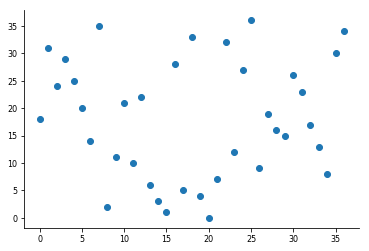

In [16]:
plt.scatter(dsort, csort)

In [17]:
er3.shape

(37, 10)

Text(0.5, 0, 'raw delta d-prime')

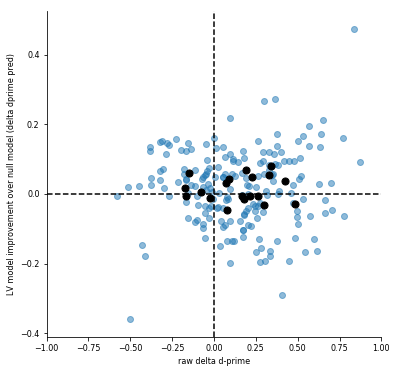

In [18]:
ff = filter
ff = (cc_diff.max(axis=0)<0.5) & (diag_diff.max(axis=0)<10)
f, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter((raw[ff].flatten()), er1[ff].flatten()-er3[ff].flatten(), alpha=0.5)
ax.scatter((raw[ff]).mean(axis=-1), er1[ff].mean(axis=-1)-er3[ff].mean(axis=-1), alpha=1, s=50, color="k")
ax.set_xlim((-1, 1))
ax.axvline(0, linestyle="--", color="k")
ax.axhline(0, linestyle="--", color="k")
ax.set_ylabel("LV model improvement over null model (delta dprime pred)")
ax.set_xlabel("raw delta d-prime")

In [20]:
ss.wilcoxon(er1[ff].flatten()-er3[ff].flatten())
#ss.wilcoxon(er1[ff].mean(axis=-1)-er3[ff].mean(axis=-1))

WilcoxonResult(statistic=7492.0, pvalue=0.037314703906957465)

Text(0, 0.5, 'Mean LV model improvement of delta dprime pred')

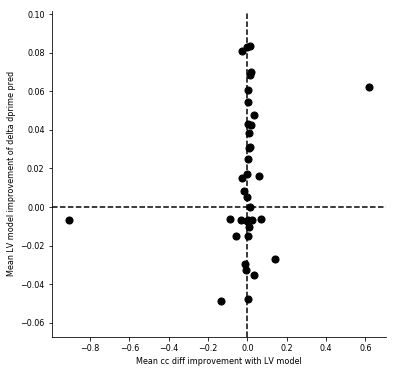

In [21]:
ff = filter
ff = np.array([True]*(len(ff)))
cerr = cc_diff[3, ff]-cc_diff[2, ff]

f, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(cerr, er1[ff].mean(axis=-1)-er3[ff].mean(axis=-1), alpha=1, s=50, color="k")
#ax.set_xlim((-.1, .1))
ax.axvline(0, linestyle="--", color="k")
ax.axhline(0, linestyle="--", color="k")
ax.set_xlabel("Mean cc diff improvement with LV model")
ax.set_ylabel("Mean LV model improvement of delta dprime pred")


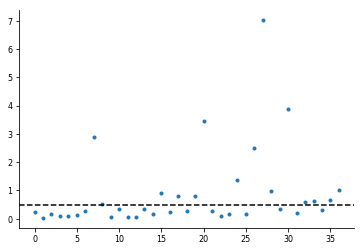

In [22]:
plt.plot(np.max(cc_diff, axis=0), '.')
plt.axhline(0.5, linestyle="--", color="k")

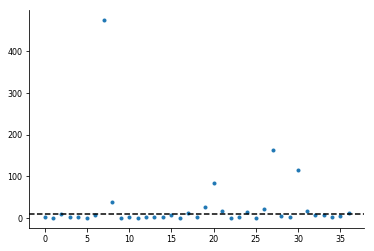

In [23]:
plt.plot(np.max(diag_diff, axis=0), ".")
plt.axhline(10, linestyle="--", color="k")

In [26]:
ff = (cc_diff.max(axis=0)>0.5) | (diag_diff.max(axis=0)>10)
np.array(site_batches)[ff]

array(['ARM029a_331', 'TNC013a_331', 'TNC014a_331', 'TAR010c_322',
       'bbl086b_322', 'DRX006b.e65:128_322', 'DRX007a.e1:64_322',
       'DRX007a.e65:128_322', 'CRD016d_322', 'TNC008a_322', 'TNC009a_322',
       'TNC010a_322', 'TNC013a_322', 'TNC014a_322', 'TNC015a_322',
       'TNC016a_322', 'TNC018a_322', 'TNC020a_322'], dtype='<U19')

Text(0, 0.5, 'Mean LV model improvement of delta dprime pred')

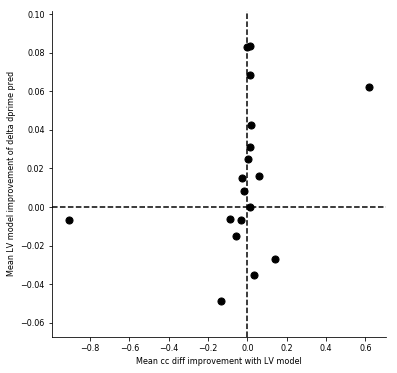

In [28]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))

cerr = cc_diff[3, ff]-cc_diff[2, ff]
ax.scatter(cerr, er1[ff].mean(axis=-1)-er3[ff].mean(axis=-1), alpha=1, s=50, color="k")
#ax.set_xlim((-.1, .1))
ax.axvline(0, linestyle="--", color="k")
ax.axhline(0, linestyle="--", color="k")
ax.set_xlabel("Mean cc diff improvement with LV model")
ax.set_ylabel("Mean LV model improvement of delta dprime pred")

In [ ]:
# rep mean cc error over len(stim_pairs) so we can look at individual c_errs